First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 

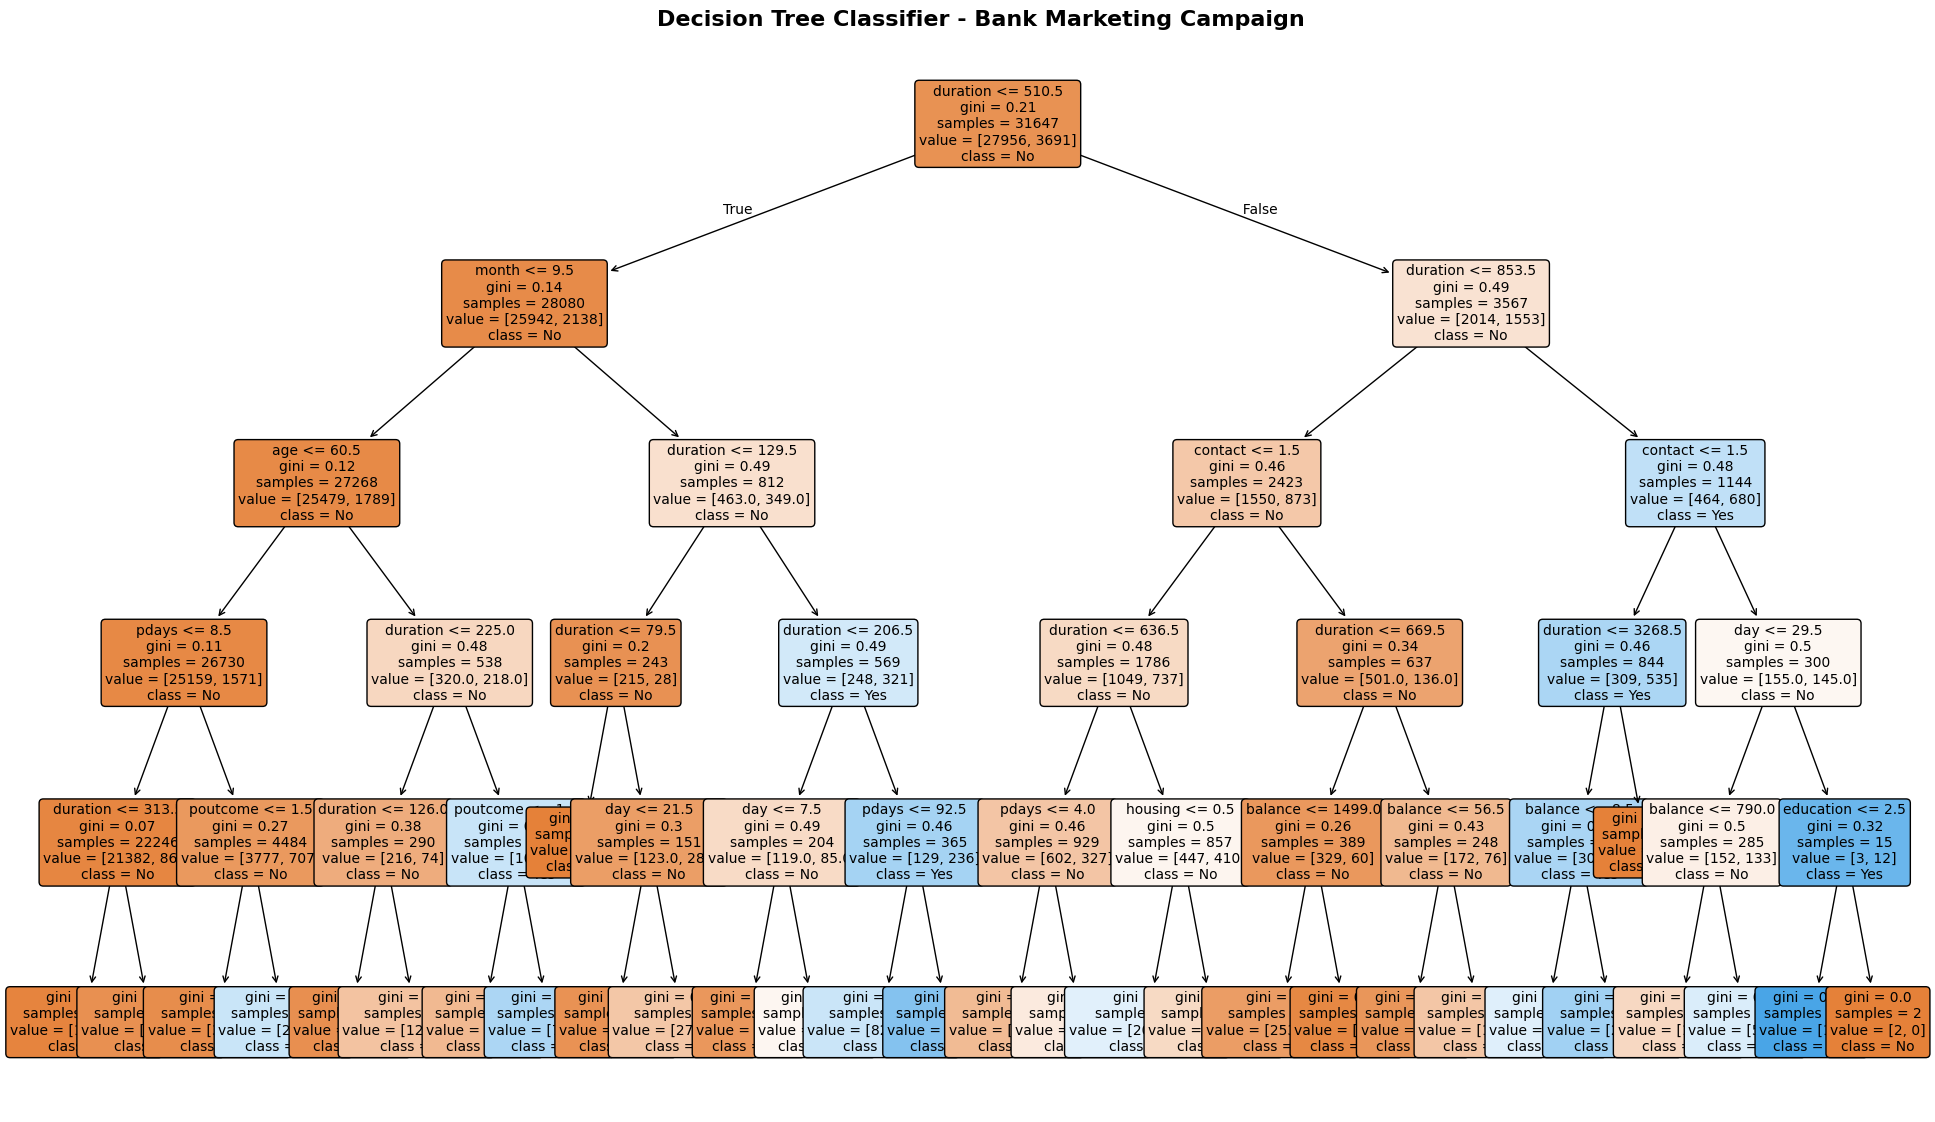

In [1]:
# Step 1: Import libraries
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Load the CSV
df = pd.read_csv("C:\\Users\\Nishtha Sethi\\OneDrive\\Documents\\bank\\bank-full.csv", sep=';')
# Step 3: Initial Exploration
print("First 5 rows:\n", df.head())
print("\nInfo:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())
# Step 4: Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
# Step 5: Split into features and target
X = df.drop('y', axis=1)
y = df['y']
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 7: Build Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)
# Step 8: Predictions
y_pred = clf.predict(X_test)
# Step 9: Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Step 10: Visualize the Tree
plt.figure(figsize=(24, 14))  # Larger figure for clarity
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10,          # Smaller font for readability
    precision=2,          # Decimal precision for values
    impurity=True         # Show Gini index
)
plt.title("Decision Tree Classifier - Bank Marketing Campaign", fontsize=16, weight='bold')
plt.show()